In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
RANDOM_STATE = 55

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#One-hot encoding categorical variables
cat_variables = ['Sex' , 'ChestPainType' , 'RestingECG' , 'ExerciseAngina' , 'ST_Slope']
df = pd.get_dummies(data=df,
                    prefix = cat_variables,
                    columns = cat_variables)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [5]:
features = [x for x in df.columns if x not in 'HeartDisease']
print(len(features))

20


In [6]:
x_train,x_test,y_train,y_test = train_test_split(df[features],df['HeartDisease'],test_size=0.2,random_state=RANDOM_STATE)

print(f'train samples: {len(x_train)}')
print(f'validation samples: {len(x_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}') 

train samples: 734
validation samples: 184
target proportion: 0.5518


 The hyperparameters we will use and investigate here are:

min_samples_split: The minimum number of samples required to split an internal node.

Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.

max_depth: The maximum depth of the tree.
Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.


In [7]:
min_samples_split_list = [2,10,30,50,100,200,300,700]
max_depth_list = [1,2,3,4,8,16,32,64,None]

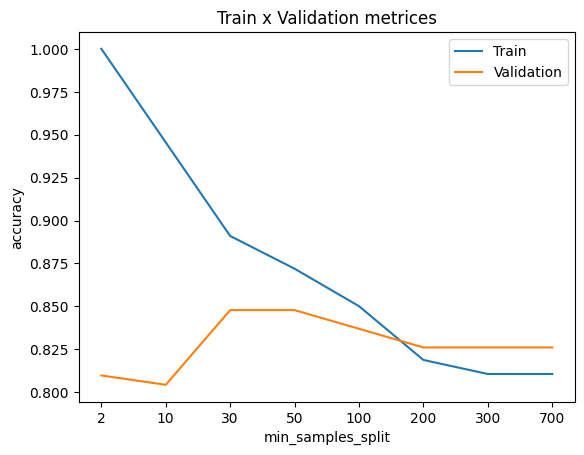

In [8]:
accuracy_list_train = []
accuracy_list_test = []

for min_sample_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_sample_split,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)

    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrices')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)),labels = min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train' , 'Validation'])

Increasing min_samples_split from 10 to 30, and from 30 to 50, even though it does not improve the validation accuracy, it brings the training accuracy closer to it, showing a reduction in overfitting.

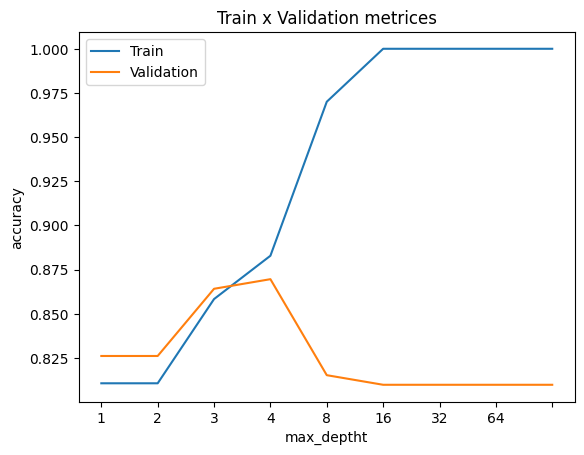

In [9]:
accuracy_list_train = []
accuracy_list_test = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)

    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrices')
plt.xlabel('max_deptht')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels = max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train' , 'Validation'])


Reducing max_depth from 8 to 4 increases validation accuracy closer to training accuracy, while significantly reducing training accuracy.
The validation accuracy reaches the highest at tree_depth=4.
When the max_depth is smaller than 3, both training and validation accuracy decreases. The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set).
When the max_depth is too high ( >= 5), validation accuracy decreases while training accuracy increases, indicating that the model is overfitting to the training set.

So we can choose the best values for these two hyper-parameters for our model to be:

    max_depth = 4
    min_samples_split = 50


In [10]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=50,max_depth=4,random_state=RANDOM_STATE)
decision_tree_model.fit(x_train,y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8665
Metrics validation:
	Accuracy score: 0.8696
